In [1]:
# Import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

plt.rc('font', size=35) 

In [2]:
df = pd.read_excel('data/nov_2020_rejects.xlsx')

In [3]:
df.loc[df['JURISDICTION'] == 'CLINTON TOWNSHIP']

,Unnamed: 0,DLCOUNTYCODE,JURISDCODE,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,VOTER REJECTED,VOTER DECEASED,VOTED AT POLLS,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED
769,770.0,46.0,16500.0,LENAWEE COUNTY,CLINTON TOWNSHIP,1297,1217,0.0,0.0,2.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,10
830,831.0,50.0,16520.0,MACOMB COUNTY,CLINTON TOWNSHIP,37350,34575,24.0,13.0,42.0,0.0,149.0,1.0,0.0,48.0,0.0,1.0,0.0,278
1185,1186.0,68.0,16540.0,OSCODA COUNTY,CLINTON TOWNSHIP,134,110,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1


In [4]:
dupes_sw = df[df['JURISDCODE'].duplicated(keep=False)]
dupes_sw

,Unnamed: 0,DLCOUNTYCODE,JURISDCODE,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,VOTER REJECTED,VOTER DECEASED,VOTED AT POLLS,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED


In [5]:
df.shape

(1521, 19)

In [6]:
list(df.columns)

['Unnamed: 0',
 'DLCOUNTYCODE',
 'JURISDCODE',
 'COUNTY',
 'JURISDICTION',
 'BALLOTS ISSUED',
 'BALLOTS TABULATED',
 'NO SIGNATURE',
 'SIGNATURE NO MATCH',
 'BALLOT LATE',
 'VOTER SENTENCED',
 'VOTER MOVED',
 'VOTER CANCELLED',
 'VOTER REJECTED',
 'VOTER DECEASED',
 'VOTED AT POLLS',
 'NO BALLOT IN ENVELOPE',
 'ID NOT CONFIRMED',
 'TOTAL BALLOTS REJECTED']

In [7]:
jurisdictions = pd.read_excel('data/focus jurisdictions.xlsx')

In [8]:
list(jurisdictions.columns)

['jurisdiction ']

In [9]:
jurisdictions.shape

(54, 1)

In [10]:
jurisdictions.isna().sum()

jurisdiction     0
dtype: int64

In [11]:
new_juris = jurisdictions['jurisdiction '].str.split("(", n=1, expand=True)

In [12]:
new_juris = new_juris.rename({0: "jurisdiction"}, axis='columns')

In [13]:
focus_jurisdictions = new_juris[['jurisdiction']]

In [14]:
#Make a series with focus jurisdictions in all caps 
focus_jurisdictions = focus_jurisdictions['jurisdiction'].str.upper().str.rstrip()

In [15]:
focus_jurisdictions = focus_jurisdictions.to_list()

In [16]:
focus_jurisdictions

['ALBION CITY',
 'ALLENDALE TOWNSHIP',
 'ANN ARBOR CITY',
 'BATTLE CREEK CITY',
 'BAY CITY CITY',
 'BENTON CHARTER TOWNSHIP',
 'BENTON HARBOR CITY',
 'BUENA VISTA CHARTER TOWNSHIP',
 'CANTON TOWNSHIP',
 'CENTER LINE CITY',
 'CLINTON TOWNSHIP',
 'CLYDE TOWNSHIP',
 'COVERT TOWNSHIP',
 'DEARBORN CITY',
 'DEARBORN HEIGHTS CITY',
 'DETROIT CITY',
 'EASTPOINTE CITY',
 'EAST LANSING CITY',
 'ECORSE CITY',
 'FENNVILLE',
 'FLINT CITY',
 'FLINT TOWNSHIP',
 'GRAND RAPIDS CITY',
 'HAMTRAMCK CITY',
 'HARPER WOODS CITY',
 'HARRIS TOWNSHIP',
 'HIGHLAND PARK CITY',
 'HOLLAND CITY',
 'HOLLAND TOWNSHIP',
 'INKSTER',
 'KALAMAZOO CITY',
 'KENTWOOD CITY',
 'LANSING CITY',
 'LIVONIA',
 'MARQUETTE CITY',
 'MOUNT PLEASANT CITY',
 'MUSKEGON CITY',
 'MUSKEGON HEIGHTS CITY',
 'NOVI CITY',
 'OAK PARK CITY',
 'PONTIAC CITY',
 'PORT HURON CITY',
 'REDFORD TOWNSHIP',
 'RIVER ROUGE CITY',
 'ROYAL OAK TOWNSHIP',
 'SAGINAW CITY',
 'ST. CLAIR SHORES CITY',
 'STERLING HEIGHTS CITY',
 'SOUTHFIELD CITY',
 'TROY CITY',
 'WA

In [17]:
focused_df = df[df['JURISDICTION'].isin(focus_jurisdictions)]

In [18]:
focused_df.shape

(54, 19)

In [19]:
focused_df

,Unnamed: 0,DLCOUNTYCODE,JURISDCODE,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,VOTER REJECTED,VOTER DECEASED,VOTED AT POLLS,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED
25,26.0,3.0,16720.0,ALLEGAN COUNTY,CLYDE TOWNSHIP,404,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
115,116.0,9.0,6020.0,BAY COUNTY,BAY CITY CITY,9412,8760,1.0,15.0,3.0,0.0,18.0,6.0,0.0,4.0,97.0,0.0,0.0,144
146,147.0,11.0,7400.0,BERRIEN COUNTY,BENTON CHARTER TOWNSHIP,4457,4160,2.0,0.0,0.0,0.0,13.0,0.0,0.0,1.0,0.0,0.0,0.0,16
147,148.0,11.0,7520.0,BERRIEN COUNTY,BENTON HARBOR CITY,2461,2153,4.0,3.0,2.0,0.0,11.0,0.0,0.0,1.0,60.0,1.0,0.0,82
192,193.0,13.0,980.0,CALHOUN COUNTY,ALBION CITY,1793,1618,0.0,2.0,1.0,0.0,8.0,0.0,0.0,3.0,0.0,0.0,0.0,14
195,196.0,13.0,5920.0,CALHOUN COUNTY,BATTLE CREEK CITY,13636,12310,0.0,18.0,10.0,0.0,41.0,1.0,0.0,15.0,0.0,0.0,0.0,85
404,405.0,25.0,29000.0,GENESEE COUNTY,FLINT CITY,22860,19821,40.0,25.0,36.0,0.0,56.0,0.0,0.0,24.0,1.0,0.0,0.0,182
405,406.0,25.0,29020.0,GENESEE COUNTY,FLINT TOWNSHIP,11484,10417,18.0,0.0,8.0,0.0,51.0,4.0,0.0,15.0,0.0,5.0,0.0,101
555,556.0,33.0,24120.0,INGHAM COUNTY,EAST LANSING CITY,12696,11587,4.0,1.0,31.0,0.0,189.0,2.0,0.0,7.0,0.0,0.0,0.0,234
557,558.0,33.0,46000.0,INGHAM COUNTY,LANSING CITY,40151,36398,27.0,3.0,53.0,0.0,203.0,2.0,0.0,33.0,460.0,0.0,21.0,802


In [20]:
dupes = focused_df[focused_df['JURISDICTION'].duplicated(keep=False)]
dupes

,Unnamed: 0,DLCOUNTYCODE,JURISDCODE,COUNTY,JURISDICTION,BALLOTS ISSUED,BALLOTS TABULATED,NO SIGNATURE,SIGNATURE NO MATCH,BALLOT LATE,VOTER SENTENCED,VOTER MOVED,VOTER CANCELLED,VOTER REJECTED,VOTER DECEASED,VOTED AT POLLS,NO BALLOT IN ENVELOPE,ID NOT CONFIRMED,TOTAL BALLOTS REJECTED
25,26.0,3.0,16720.0,ALLEGAN COUNTY,CLYDE TOWNSHIP,404,340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
769,770.0,46.0,16500.0,LENAWEE COUNTY,CLINTON TOWNSHIP,1297,1217,0.0,0.0,2.0,0.0,3.0,0.0,0.0,5.0,0.0,0.0,0.0,10
830,831.0,50.0,16520.0,MACOMB COUNTY,CLINTON TOWNSHIP,37350,34575,24.0,13.0,42.0,0.0,149.0,1.0,0.0,48.0,0.0,1.0,0.0,278
961,962.0,57.0,38620.0,MISSAUKEE COUNTY,HOLLAND TOWNSHIP,59,57,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1185,1186.0,68.0,16540.0,OSCODA COUNTY,CLINTON TOWNSHIP,134,110,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1210,1211.0,70.0,38660.0,OTTAWA COUNTY,HOLLAND TOWNSHIP,11514,10564,6.0,10.0,14.0,0.0,35.0,13.0,0.0,11.0,0.0,2.0,0.0,91
1287,1288.0,74.0,16760.0,ST CLAIR COUNTY,CLYDE TOWNSHIP,1912,1827,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [21]:
focused_df = focused_df.drop(focused_df.index[(focused_df['JURISDCODE'] == 16500.0) |  (focused_df['JURISDCODE'] == 38620.0) | (focused_df['JURISDCODE'] == 16540.0) | (focused_df['JURISDCODE'] == 16760.0)])

In [22]:
focused_df.duplicated(subset=['JURISDICTION']).sum()

0

In [23]:
focused_df.shape

(50, 19)

In [24]:
df2 = focused_df.drop(columns=['Unnamed: 0','DLCOUNTYCODE', 'JURISDCODE'], axis=1).reset_index(drop=True)

In [25]:
all_rejections = df.sum(numeric_only=True, axis=0).to_frame().reset_index()

In [26]:
all_rejections

,index,0
0,Unnamed: 0,1155960.0
1,DLCOUNTYCODE,67413.0
2,JURISDCODE,66185463.0
3,BALLOTS ISSUED,7149824.0
4,BALLOTS TABULATED,6575318.0
5,NO SIGNATURE,1855.0
6,SIGNATURE NO MATCH,1403.0
7,BALLOT LATE,3556.0
8,VOTER SENTENCED,5.0
9,VOTER MOVED,12251.0


In [27]:
all_rejections2 = all_rejections.iloc[5:16]

In [28]:
all_rejections2 = all_rejections2.sort_values(ascending=False, by=[0]).reset_index()

In [29]:
all_rejections2

,level_0,index,0
0,13,VOTED AT POLLS,25275.0
1,9,VOTER MOVED,12251.0
2,7,BALLOT LATE,3556.0
3,12,VOTER DECEASED,3469.0
4,5,NO SIGNATURE,1855.0
5,6,SIGNATURE NO MATCH,1403.0
6,10,VOTER CANCELLED,966.0
7,14,NO BALLOT IN ENVELOPE,85.0
8,11,VOTER REJECTED,62.0
9,15,ID NOT CONFIRMED,59.0


In [30]:
sw_avoidables = all_rejections2.iloc[[2,4,5,7,9]]

In [31]:
sw_avoidables

,level_0,index,0
2,7,BALLOT LATE,3556.0
4,5,NO SIGNATURE,1855.0
5,6,SIGNATURE NO MATCH,1403.0
7,14,NO BALLOT IN ENVELOPE,85.0
9,15,ID NOT CONFIRMED,59.0


In [32]:
rejects_categories = ["NO SIGNATURE", "SIGNATURE NO MATCH", "BALLOT LATE", "NO BALLOT IN ENVELOPE", "ID NOT CONFIRMED"]
sw_avoidables["index"] = pd.Categorical(sw_avoidables["index"], categories = rejects_categories)
sw_avoidables.sort_values(by = "index")

<ipython-input-32-965e11898a18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw_avoidables["index"] = pd.Categorical(sw_avoidables["index"], categories = rejects_categories)


,level_0,index,0
4,5,NO SIGNATURE,1855.0
5,6,SIGNATURE NO MATCH,1403.0
2,7,BALLOT LATE,3556.0
7,14,NO BALLOT IN ENVELOPE,85.0
9,15,ID NOT CONFIRMED,59.0


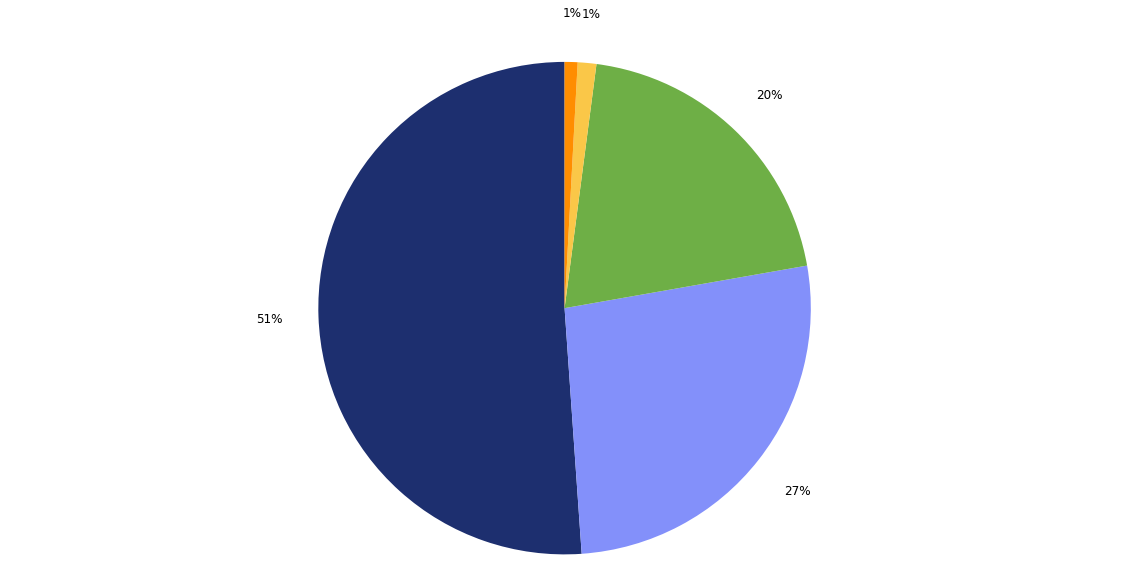

In [43]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

plt.rc('font', size=12)  

labels = 'No Signature', 'Signature Does Not Match', 'Ballot Late','Ballot Missing','ID Not Confirmed'
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#FF8D00']

title = 'Avoidable Reasons for Rejected Ballots, Statewide'

fig1, ax1 = plt.subplots(1, figsize=(20,10))
ax1.pie(sw_avoidables[0], labels=labels, colors=colors, autopct='%1.0f%%',
       startangle=90, labeldistance=None, pctdistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('sw_avoidables')
#plt.title(title, loc='left')

#plt.legend(labels)

plt.show()

In [ ]:
#piechart

In [ ]:
sw_avoidables_pie = sw_avoidables[['index',0]]

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

plt.rc('font', size=35)  

labels = 'No Signature', 'Signature Does Not Match', 'Ballot Late','Ballot Missing','ID Not Confirmed'
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#FF8D00']
title = 'Administrative Reasons for Rejected Ballots'

fig1, ax1 = plt.subplots(1, figsize=(40,30))
ax1.pie(piechart['TOTALS'], labels=labels, colors=colors, autopct='%1.0f%%',
       startangle=90, labeldistance=None, pctdistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(title, loc='left')

plt.legend(labels)

plt.show()

In [ ]:
#ep_rejects = df2.sum(numeric_only=True, axis=0).to_frame().reset_index()

In [ ]:
#ep_rejects = ep_rejects.sort_values(by=[0],ascending=False)

In [ ]:
#ep_rejects

In [ ]:
top5 = all_rejections2.iloc[0:5]

In [ ]:
top5 = top5.rename({0: 'Number of Ballots'}, axis = 'columns').set_index('index')

In [ ]:
top5

In [ ]:
#Make bar chart here 
#Bar chart for smaller jurisdictions first 
# fields = ['VOTED AT POLLS','VOTER MOVED', 'BALLOT LATE','VOTER DECEASED','NO SIGNATURE']
# colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['Voted at Polls','Voter Moved','Ballot Late','Voter Deceased','No Signature']

plt.rc('font', size=20) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(28,10))
#plot bars
#left = len(top5) * [0]
# for idx, name in enumerate(fields): 
#     rects = plt.barh(top5.index, small_juris[name], left=left, color=colors[idx])
#     left = left + top5[name]
#     for c in ax.containers: 
#         labels2 = [v.get_width() if v.get_width() > 0 else '' for v in c]
#         ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff', fmt='.0f')
#title, legend, labels

#ax = top5.plot.bar(y='Number of Ballots')

y = ['Voted At Polls','Voter Moved','Ballot Late','Voter Deceased','No Signature']
x = [25275,12251,3556,3469,1855]

plt.barh(y, x, color = '#1D2F6F')
bars = ax.barh(y,x)
ax.bar_label(bars, labels=[f'{x:,.0f}' for x in bars.datavalues])


plt.title('Top 5 Reasons for Rejected Ballots\n', loc='center')
#plt.legend(labels)
#plt.xticks([0,1,2,3,4],labels=labels)
plt.xlabel('Number of Ballots Rejected', labelpad = 20)
plt.ylabel('Reason for Rejected Ballot', labelpad=20)

current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])

#remove spines
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
# plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
# ax.set_axisbelow(True)
# ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [ ]:
df2['OTHER'] = df2['VOTER MOVED'] + df2['VOTER DECEASED'] + df2['VOTED AT POLLS'] + df2['VOTER SENTENCED'] + df2['VOTER CANCELLED'] + df2['VOTER REJECTED']

In [ ]:
df2['SIGNATURE ISSUES'] = df2['NO SIGNATURE'] + df2['SIGNATURE NO MATCH']

In [ ]:
df2['REJECTED RATE'] = df2['TOTAL BALLOTS REJECTED']/df2['BALLOTS TABULATED']

In [ ]:
df2['NO SIG RATE'] = df2['NO SIGNATURE']/df2['TOTAL BALLOTS REJECTED']

In [ ]:
df2['ID NOT CONF RATE'] = df2['ID NOT CONFIRMED']/df2['TOTAL BALLOTS REJECTED']

In [ ]:
df2['NO MATCH RATE'] = df2['SIGNATURE NO MATCH']/df2['TOTAL BALLOTS REJECTED']

In [ ]:
df2['BALLOT LATE RATE'] = df2['BALLOT LATE']/df2['TOTAL BALLOTS REJECTED']

In [ ]:
df2['ENV EMPTY RATE'] = df2['NO BALLOT IN ENVELOPE']/df2['TOTAL BALLOTS REJECTED']

In [ ]:
sorted = df2.sort_values('TOTAL BALLOTS REJECTED', ascending = False)

In [ ]:
sorted.head()

In [ ]:
list(sorted.columns)

In [ ]:
numbers_df = sorted[['JURISDICTION','NO SIGNATURE','SIGNATURE NO MATCH','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']]

In [ ]:
numbers_df['ADMIN TOTALS'] = numbers_df['NO SIGNATURE'] + numbers_df['SIGNATURE NO MATCH'] + numbers_df['BALLOT LATE'] + numbers_df['NO BALLOT IN ENVELOPE'] + numbers_df['ID NOT CONFIRMED']

In [ ]:
list(numbers_df.columns)

In [ ]:
numbers_df = numbers_df.rename(columns={'ADMIN TOTALS':'ADMIN_TOTALS'})
#.sort_values(by='ADMIN_TOTALS',ascending=False).astype(int)

In [ ]:
numbers_df['NO SIG RATE'] = numbers_df['NO SIGNATURE']/numbers_df['ADMIN_TOTALS'] * 100

In [ ]:
numbers_df['NO MATCH RATE'] = numbers_df['SIGNATURE NO MATCH']/numbers_df['ADMIN_TOTALS'] * 100

In [ ]:
numbers_df['BALLOT LATE RATE'] = numbers_df['BALLOT LATE']/numbers_df['ADMIN_TOTALS'] * 100

In [ ]:
numbers_df['NO BALLOT RATE'] = numbers_df['NO BALLOT IN ENVELOPE']/numbers_df['ADMIN_TOTALS'] * 100

In [ ]:
numbers_df['ID NOT CONF RATE'] = numbers_df['ID NOT CONFIRMED']/numbers_df['ADMIN_TOTALS'] * 100

In [ ]:
numbers_df2 = numbers_df[['JURISDICTION','NO SIGNATURE','SIGNATURE NO MATCH','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED','ADMIN_TOTALS']]

In [ ]:
numbers_df2 = numbers_df2.set_index('JURISDICTION')

In [ ]:
missing_jurisdictions = numbers_df2[numbers_df2.ADMIN_TOTALS == 0]

In [ ]:
omitted_jurisdictions = list(missing_jurisdictions.index)

In [ ]:
omitted_jurisdictions

In [ ]:
numbers_df3 = numbers_df2[numbers_df2.ADMIN_TOTALS != 0.0]

In [ ]:
numbers_df3 = numbers_df3.sort_values(by='ADMIN_TOTALS',ascending=False).astype(int)

In [ ]:
transposed = numbers_df3.transpose()

In [ ]:
column_names = list(transposed.columns)

In [ ]:
transposed['TOTALS'] = transposed[column_names].sum(axis=1)

In [ ]:
transposed2 = transposed.drop(index = ('ADMIN_TOTALS'))

In [ ]:
piechart = transposed2[['TOTALS']]

In [ ]:
piechart

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

plt.rc('font', size=35)  

labels = 'No Signature', 'Signature Does Not Match', 'Ballot Late','Ballot Missing','ID Not Confirmed'
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#FF8D00']
title = 'Administrative Reasons for Rejected Ballots'

fig1, ax1 = plt.subplots(1, figsize=(40,30))
ax1.pie(piechart['TOTALS'], labels=labels, colors=colors, autopct='%1.0f%%',
       startangle=90, labeldistance=None, pctdistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(title, loc='left')

plt.legend(labels)

plt.show()

Code for the below plot courtesy of [Thiago Carvalho](https://towardsdatascience.com/stacked-bar-charts-with-pythons-matplotlib-f4020e4eb4a7).

In [ ]:
plt.bar([1,2,3,4], [10,30,20,5])
plt.bar([1,2,3,4], [3,4,5,6], bottom = [10,30,20,5])
plt.show()
plt.barh([1,2,3,4], [10,30,20,5])
plt.barh([1,2,3,4], [3,4,5,6], left = [10,30,20,5])
plt.show()

In [ ]:
small_juris = numbers_df2[numbers_df2.ADMIN_TOTALS < 60]

In [ ]:
large_juris = numbers_df2[(numbers_df2.ADMIN_TOTALS >= 60) & (numbers_df2.ADMIN_TOTALS <= 900)]

In [ ]:
detroit = numbers_df2[numbers_df2.ADMIN_TOTALS > 900]

In [ ]:
print(numbers_df2.shape)
print(small_juris.shape)
print(large_juris.shape)
print(detroit.shape)

In [ ]:
#Bar chart for smaller jurisdictions first 
fields = ['NO SIGNATURE','SIGNATURE NO MATCH', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['No Signature','Signature Does Not Match','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(70,55))
#plot bars
left = len(small_juris) * [0]
for idx, name in enumerate(fields): 
    rects = plt.barh(small_juris.index, small_juris[name], left=left, color=colors[idx])
    left = left + small_juris[name]
    for c in ax.containers: 
        labels2 = [v.get_width() if v.get_width() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff', fmt='.0f')
#title, legend, labels
plt.title('Administrative Ballot Rejections for Jurisdictions with 60 or Fewer Rejections\n', loc='center')
plt.legend(labels)
plt.xlabel('Total Ballots Rejected')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()
#Royal Oak Township, Harris Township, Holland Township, Clyde Township, Covert Township, Buena Vista Charter Township, 
#and River Rouge City are not shown in graphs because they had zero rejected ballots in 2020. 

In [ ]:
#Bar chart for larger jurisdictions next 
fields = ['NO SIGNATURE','SIGNATURE NO MATCH', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['No Signature','Signature Does Not Match','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(70,55))
#plot bars
left = len(large_juris) * [0]
for idx, name in enumerate(fields): 
    rects = plt.barh(large_juris.index, large_juris[name], left=left, color=colors[idx])
    left = left + large_juris[name]
    for c in ax.containers: 
        labels2 = [v.get_width() if v.get_width() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff', fmt='.0f')
#title, legend, labels
plt.title('Administrative Ballot Rejections for Jurisdictions, 60-200 Rejections\n', loc='center')
plt.legend(labels)
plt.xlabel('Total Ballots Rejected')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [ ]:
detroit.head()

In [ ]:
detroit_pie = detroit[['NO SIGNATURE','SIGNATURE NO MATCH','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']].transpose()

In [ ]:
detroit_pie

In [ ]:
# Pie chart for Detroit
plt.rc('font', size=35)  

labels = 'No Signature', 'Signature Does Not Match', 'Ballot Late','Ballot Missing','ID Not Confirmed'
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748','#FF8D00']
title = 'Administrative Ballot Rejections for Detroit City'

fig1, ax1 = plt.subplots(1, figsize=(40,30))
ax1.pie(detroit_pie['DETROIT CITY'], labels=labels, colors=colors, autopct='%1.0f%%',
       startangle=90, labeldistance=None, pctdistance=1.2)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(title, loc='left')

plt.legend(labels)

plt.savefig('detroit_pie.png')

plt.show()

In [ ]:
#Lastly, bar chart for Detroit
fields = ['NO SIGNATURE','SIGNATURE NO MATCH', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['No Signature','Signature Does Not Match','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=200) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(200,150))
#plot bars
left = len(detroit) * [0]
for idx, name in enumerate(fields): 
    rects = plt.barh(detroit.index, detroit[name], left=left, color=colors[idx], height=.5)
    left = left + detroit[name]
    for c in ax.containers: 
        labels2 = [v.get_width() if v.get_width() > 10 else '' for v in c]
        ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff', fmt='.0f')
#title, legend, labels
plt.title('Administrative Ballot Rejections for Detroit City\n', loc='center')
plt.legend(labels)
plt.xlabel('Total Ballots Rejected')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

#Add in marks for ballot missing (10) and ID not confirmed (2) later

In [ ]:
list(numbers_df.columns)

In [ ]:
ratesdf = numbers_df[['NO SIG RATE','NO MATCH RATE','BALLOT LATE RATE','ENV EMPTY RATE','ID NOT CONF RATE']]

In [ ]:
ratesdf = ratesdf.dropna().round(1)

In [ ]:
ratesdf

In [ ]:
fields4 = ['NO SIG RATE', 'NO MATCH RATE','BALLOT LATE RATE','NO BALLOT RATE','ID NOT CONF RATE']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#FF8D00']
labels = ['Signature Issues','Signature Does Not Match','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=80) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(100,200))
#plot bars
left = len(ratesdf) * [0]
for idx, name in enumerate(fields4): 
    plt.barh(ratesdf.index, ratesdf[name], left=left, color=colors[idx], height=.75)
    left = left + ratesdf[name]
    for c in ax.containers: 
        labels2 = [f'{v.get_width():.0f}%' if v.get_width() > 0.5 else '' for v in c]
        ax.bar_label(c, labels=labels2, label_type='center', color='#ffffff',fmt='.1f')
#title, legend, labels
plt.title('Administrative Rejections by Jurisdiction\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Percentage of Ballots Rejected for Administrative Reasons')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [ ]:
clipped = sorted.loc[sorted['TOTAL BALLOTS REJECTED'] > 300]

In [ ]:
clipped.shape

In [ ]:
clipped

In [ ]:
list(clipped.columns)

In [ ]:
chart1 = clipped[['JURISDICTION','TOTAL BALLOTS REJECTED', 'SIGNATURE ISSUES','BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED','OTHER']]

In [ ]:
chart1 = chart1.set_index('JURISDICTION')

In [ ]:
#Signature issues = either the ballot wasn't signed or the signature did not match
chart1

In [ ]:
barchart1 = chart1.loc[chart1['TOTAL BALLOTS REJECTED'] > 800]

In [ ]:
#Areas where total ballots rejected was greater than 800
barchart1

In [ ]:
fields = ['OTHER','SIGNATURE ISSUES', 'BALLOT LATE','NO BALLOT IN ENVELOPE','ID NOT CONFIRMED']
colors = ['#A9ABBA','#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Other','Signature Issues','Ballot Late','Ballot Missing','ID Not Confirmed']

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(barchart1) * [0]
for idx, name in enumerate(fields): 
    plt.barh(barchart1.index, barchart1[name], left=left, color=colors[idx])
    left = left + barchart1[name]
#title, legend, labels
plt.title('Reasons for Rejection of Ballots, Top Jurisdictions\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('REJECTED BALLOTS')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [ ]:
#Areas where total ballots rejected was less than 800
barchart2 = chart1.loc[chart1['TOTAL BALLOTS REJECTED'] < 800]

In [ ]:
#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(barchart1) * [0]
for idx, name in enumerate(fields): 
    plt.barh(barchart2.index, barchart2[name], left=left, color=colors[idx])
    left = left + barchart2[name]
#title, legend, labels
plt.title('Reasons for Rejection of Ballots, Smaller Jurisdictions\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('REJECTED BALLOTS')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [ ]:
df2['OTHER RATE'] = df2['OTHER']/df2['TOTAL BALLOTS REJECTED'] 

In [ ]:
df2['SIG ISSUE RATE'] = df2['SIGNATURE ISSUES']/df2['TOTAL BALLOTS REJECTED']

In [ ]:
df2.head()

In [ ]:
sorted_rate = df2.sort_values(by='REJECTED RATE', ascending=False)

In [ ]:
sorted_rate.head(10)

In [ ]:
top10rates = sorted_rate.iloc[:10,:]

In [ ]:
top10rates

In [ ]:
top10rates['ACCEPTED RATE'] = 1 - top10rates['REJECTED RATE']

In [ ]:
top10rates

In [ ]:
chart2 = top10rates[['JURISDICTION','BALLOTS TABULATED','TOTAL BALLOTS REJECTED']].set_index('JURISDICTION').sort_values(by='TOTAL BALLOTS REJECTED', ascending=True)

In [ ]:
chart2

In [ ]:
fields2 = ['BALLOTS TABULATED','TOTAL BALLOTS REJECTED']
colors = ['#1D2F6F', '#FAC748']
labels = ['Ballots Counted','Ballots Rejected']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(chart2) * [0]
for idx, name in enumerate(fields2): 
    plt.barh(chart2.index, chart2[name], left=left, color=colors[idx])
    left = left + chart2[name]
#title, legend, labels
plt.title('Jurisdictions with Highest Ballot Rejection Rates\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Total Ballots')
#remove spines
# ax.spines['right'].set_visible(False)
# ax.spines['left'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()

In [ ]:
chart3= top10rates[['JURISDICTION','REJECTED RATE', 'SIG ISSUE RATE','BALLOT LATE RATE','ID NOT CONF RATE','ENV EMPTY RATE','OTHER RATE']].set_index('JURISDICTION')

In [ ]:
chart3.head()

In [ ]:
fields3 = ['OTHER RATE','SIG ISSUE RATE', 'BALLOT LATE RATE','ENV EMPTY RATE','ID NOT CONF RATE']
colors = ['#A9ABBA','#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Other','Signature Issues','Ballot Late','Ballot Missing','ID Not Confirmed']

plt.rc('font', size=35) 

#figure and axis
fig, ax = plt.subplots(1, figsize=(40,38))
#plot bars
left = len(chart3) * [0]
for idx, name in enumerate(fields3): 
    plt.barh(chart3.index, chart3[name], left=left, color=colors[idx])
    left = left + chart3[name]
#title, legend, labels
plt.title('Jurisdictions with Highest Ballot Rejection Rates\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Percentage of Rejected Ballots')
#remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')

plt.show()